In [34]:
# import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
file_path = 'australian-petroleum-statistics-data-extract-december-2024.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Index', 'Copyright ', 'Data sources and notes', 'Petroleum production', 'Petroleum production by basin', 'Refinery production', 'Sales of products', 'Sales by state and territory', 'Sales of lubricants', 'Imports volume', 'Imports value', 'Imports volume by country', 'Imports value by country', 'Exports volume', 'Exports value', 'Exports volume by country', 'Exports value by country', 'Destination of LNG exports', 'Stock volume by product', 'Stock mass by product', 'Consumption cover', 'IEA days net import cover', 'Stock volume incl. on the way', 'Stock IEA days incl. on the way', 'Australian fuel prices', 'OECD fuel prices and taxes']


# Australian Petroleum Production and Pricing Analysis

In this notebook, we'll analyze trends in Australian petroleum production and fuel prices using data from the Australian Government's petroleum statistics. 

The analysis will focus on two key aspects:
1. Production volumes of different petroleum products over time
2. Changes in retail fuel prices for major fuel types

These insights will help us understand Australia's energy production landscape and how fuel pricing has evolved in recent years.

In [75]:
# load a specific sheet
df1 = xls.parse('Petroleum production')

# lowercase the column names
df1.columns = (
    df1.columns
      .str.lower()
      .str.replace('[()]', '', regex=True)   # Remove all types of brackets
      .str.replace(' ', '_')
)

# last column not numeric
df1['lng_exports_mm3'] = pd.to_numeric(df1['lng_exports_mm3'], errors='coerce').fillna(0).astype('int64')

# load our next dataset
df2 = xls.parse('Australian fuel prices')

# lowercase the column names
df2.columns = (
    df2.columns
      .str.lower()
      .str.replace('[()]', '', regex=True)   # Remove all types of brackets
      .str.replace(' ', '_')
)

# map quarters to months
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
df2['date'] = df2['year'].astype(str) + '-' + df2['quarter'].map(quarter_to_month) + '-01'

# set to datetime, set to index, remove old columns
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)
df2.drop(columns=['year', 'quarter'], inplace=True)

## Data Preparation

Before diving into analysis, we need to properly prepare our data. We've loaded two key datasets:

1. **Petroleum Production Data**: Contains monthly volumes of different petroleum products produced in Australia
2. **Australian Fuel Prices Data**: Contains quarterly price information for various fuel types

Our preparation steps include:
- Standardizing column names (lowercase, replacing spaces with underscores)
- Converting text-based dates to proper datetime format
- Setting appropriate index for time-series analysis
- Converting production volumes to numeric formats

This clean data structure will allow us to identify trends and patterns more effectively.

In [79]:
# check it
#df1.sample(6)
#df1.info()

df2.sample(6)
#df2.info()

,premium_unleaded_petrol_95_ron_cpl,regular_unleaded_petrol_91_ron_cpl,automotive_diesel_cpl,automotive_lpg_cpl
date,,,,
2023-10-01,212,196,209,96
2013-10-01,159,148,159,80
2018-07-01,159,148,154,80
2010-04-01,139,129,130,60
2012-10-01,153,142,150,75
2013-04-01,151,141,146,64


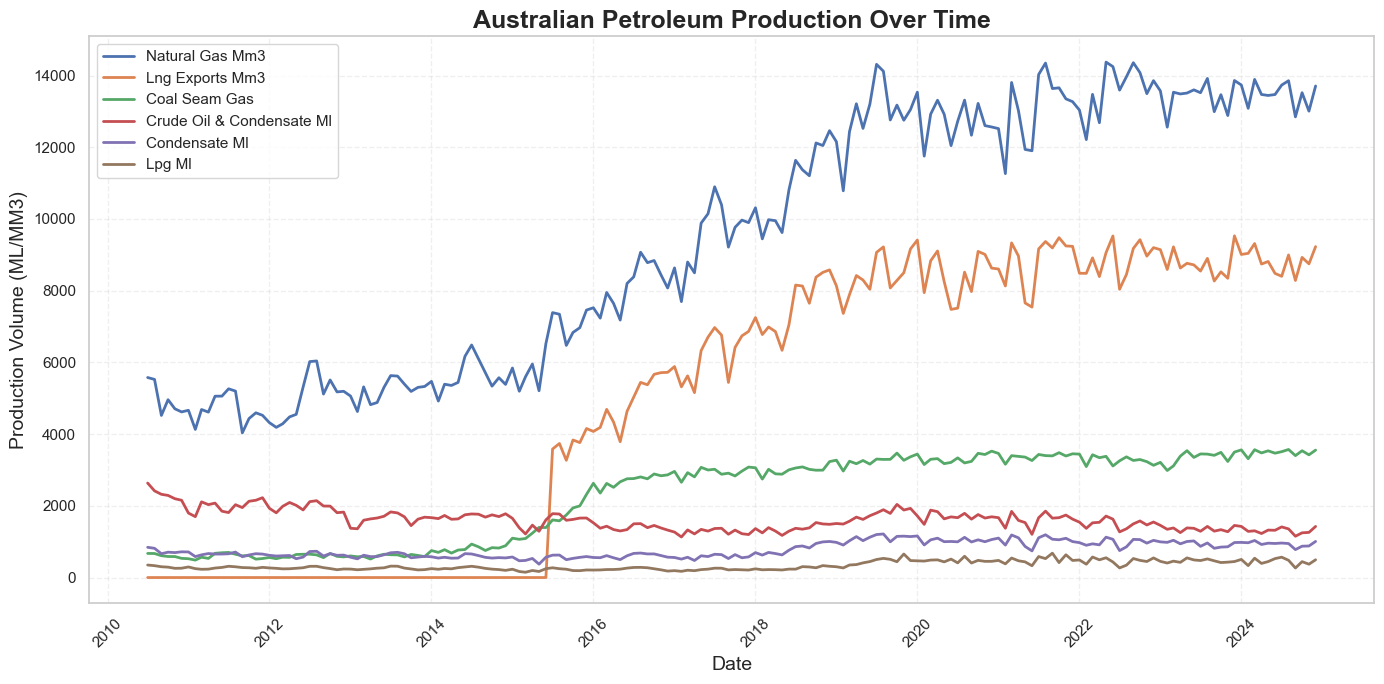

In [65]:
# plot pre-work
plt.figure(figsize=(14, 7))
palette = sns.color_palette("tab10", n_colors=len(df1.columns[2:]))
custom_labels = {'natural_gas,_of_which:_coal_seam_gas_mm3': 'Coal Seam Gas'}
value_cols = df1.columns[2:]
last_vals = df1[value_cols].iloc[-1].sort_values(ascending=False)

# plot actual
for col in last_vals.index:
    label = custom_labels.get(col, col.replace('_', ' ').title())
    plt.plot(df1['month'], df1[col], label=label, linewidth=2)
    
# tidying the plot
plt.title('Australian Petroleum Production Over Time', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Production Volume (ML/MM3)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

## Analysis of Petroleum Production Trends

The line graph above illustrates several important trends in Australian petroleum production:

1. **Diverse Production Mix**: Australia produces a variety of petroleum products, including natural gas, LPG, and various refined products.

2. **Coal Seam Gas Growth**: There has been significant growth in coal seam gas production, highlighting Australia's shift toward unconventional gas resources.

3. **Production Volatility**: Several products show considerable month-to-month volatility, which may reflect maintenance shutdowns, seasonal demand patterns, or market fluctuations.

4. **Long-term Trends**: Some products show clear upward or downward trends over time, indicating structural changes in Australia's energy production landscape.

These production patterns are critical to understanding Australia's energy security and export potential, particularly as global markets increasingly focus on cleaner energy sources.

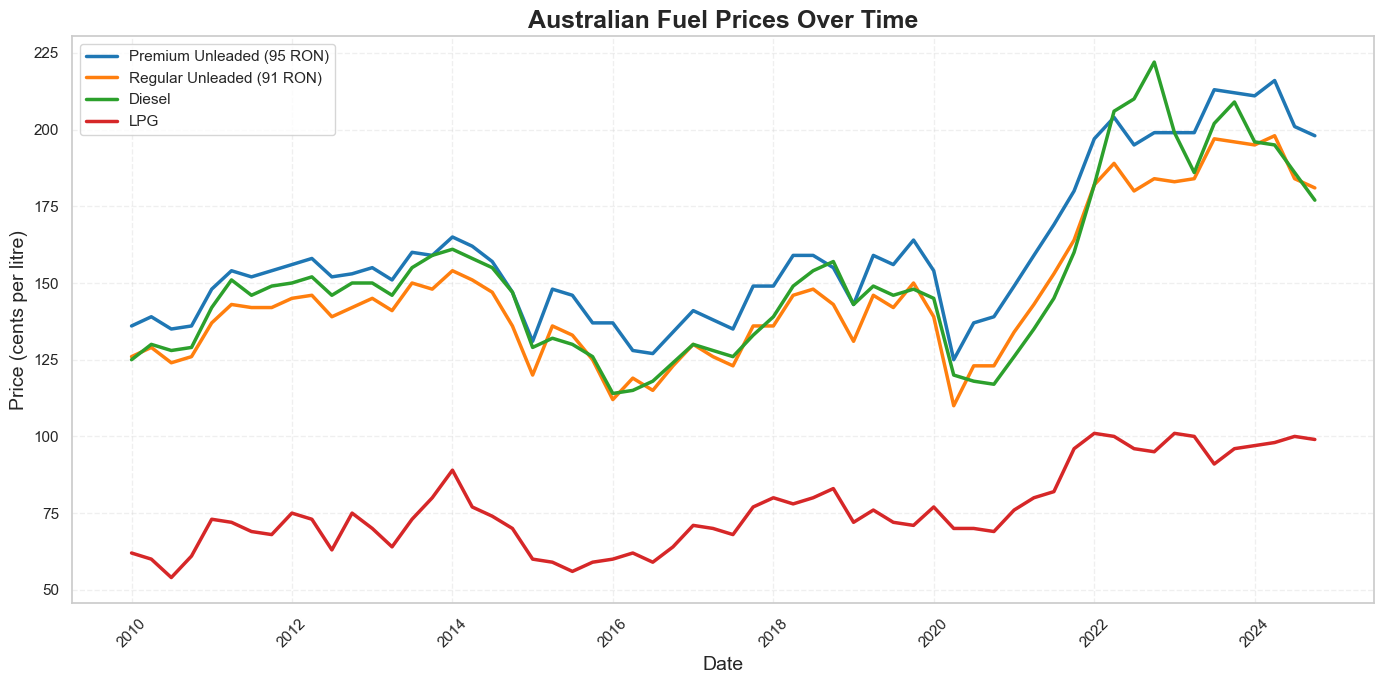

In [82]:
plt.figure(figsize=(14, 7))
palette = sns.color_palette("tab10", n_colors=len(df2.columns))

# Only fuel columns (all except the index)
value_cols = df2.columns

# Get last (most recent) values for ordering
last_vals = df2[value_cols].iloc[-1].sort_values(ascending=False)

# Optional: custom labels for legend
custom_labels = {
    'premium_unleaded_petrol_95_ron_cpl': 'Premium Unleaded (95 RON)',
    'regular_unleaded_petrol_91_ron_cpl': 'Regular Unleaded (91 RON)',
    'automotive_diesel_cpl': 'Diesel',
    'automotive_lpg_cpl': 'LPG'
}

# Plot each line in order of their most recent value (descending)
for idx, col in enumerate(last_vals.index):
    label = custom_labels.get(col, col.replace('_', ' ').title())
    plt.plot(df2.index, df2[col], label=label, linewidth=2.5, color=palette[idx])

plt.title('Australian Fuel Prices Over Time', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (cents per litre)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

## Analysis of Australian Fuel Price Trends

The visualization of Australian fuel prices reveals several significant patterns:

1. **Price Hierarchy**: Premium fuels consistently command higher prices than regular unleaded, with diesel typically positioned between premium and regular unleaded prices.

2. **Synchronized Movements**: All fuel types tend to move in the same direction simultaneously, indicating common underlying factors like global oil prices affecting the entire market.

3. **Increasing Volatility**: Recent years show more pronounced price fluctuations compared to earlier periods, suggesting increased market sensitivity and uncertainty.

4. **Long-term Price Increases**: Despite short-term fluctuations, the overall trend shows fuel prices rising over time, outpacing general inflation.

5. **COVID-19 Impact**: A notable price drop is visible during the early COVID-19 pandemic period (2020), reflecting collapsed global demand, followed by a strong recovery as economies reopened.

## Conclusions: Australia's Petroleum Landscape

Our analysis of Australian petroleum production and pricing data highlights several important insights:

1. **Production Diversification**: Australia maintains a diverse petroleum production portfolio, with increasing emphasis on natural gas resources, particularly coal seam gas.

2. **Price Pressure on Consumers**: The consistent upward trajectory of fuel prices, punctuated by periods of high volatility, creates ongoing cost pressures for Australian consumers and businesses.

3. **Global Market Integration**: The synchronization of price movements across different fuel types demonstrates Australia's deep integration with global energy markets.

4. **Energy Transition Considerations**: The production trends, particularly in gas, highlight Australia's positioning in the global energy transition - balancing traditional fossil fuel production with growing awareness of climate considerations.

These patterns underscore the complex balancing act Australia faces between energy security, economic considerations, and environmental objectives in its petroleum sector.